# Lezione 4

## Dario Pullia

### Esercizio 04.1

Spiegazioni varie

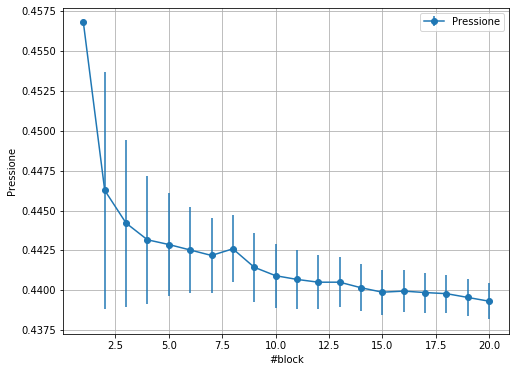

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


N=20
#ave, ave_prog, err = np.loadtxt("ex-4/MDNVE_MCNVT/output_pres.dat", usecols=(2,3,4), delimiter=' ', unpack='true')
pres, presErr= np.loadtxt("data02/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')


x = np.arange(N)+1 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")

plt.xlabel('#block')
plt.ylabel('Pressione')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()


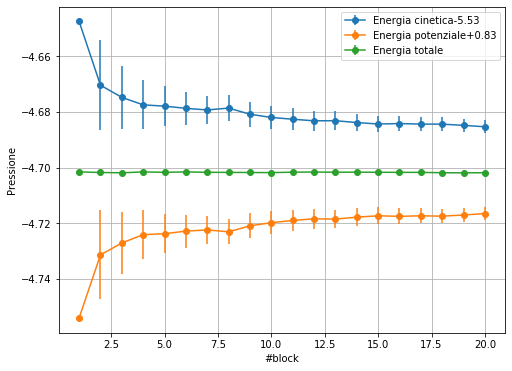

In [22]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-5.53, yerr=EkinErr, marker="o", label="Energia cinetica-5.53")
plt.errorbar(x,Epot+0.83, yerr=EpotErr, marker="o", label="Energia potenziale+0.83")
plt.errorbar(x,Etot, yerr=EtotErr, marker="o", label="Energia totale")

plt.xlabel('#block')
plt.ylabel('Pressione')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()


### Esercizio 04.2